# Init

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive
import os

repo_name = 'yolov8_tracking'

if not os.path.exists(repo_name):
    !git clone --recurse-submodules https://github.com/ryuhat/yolov8_tracking.git
else:
    print(f"Directory {repo_name} already exists. Skipping clone.")

/content/drive/MyDrive
Directory yolov8_tracking already exists. Skipping clone.


In [4]:
# @title Cell to be skipped {display-mode: "form"}

# This cell will be skipped when running the notebook.
%cd /content/drive/MyDrive/yolov8_tracking
!pip install -qr requirements.txt
print("This cell will not be executed unless 'Include this cell' is selected.")


/content/drive/MyDrive/yolov8_tracking
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.2 MB/s eta 0:00:00
This cell will not be executed unless 'Include this cell' is selected.


# Keypoint

In [ ]:
import os, sys
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import albumentations as albu


IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
MASK_DIR = '/content/drive/MyDrive/data/mask_tuna/' #@param {type:"string"}

img = cv2.imread(IMG_DIR + 'tuna1.png')
mask = cv2.imread(MASK_DIR + 'mask.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_origin, mask_origin = img.copy(), mask.copy()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(img)
axes[1].imshow(mask)
plt.show()

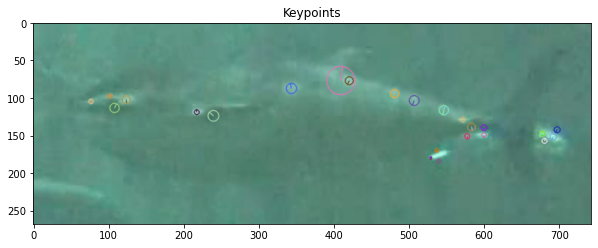

In [ ]:
import cv2
import matplotlib.pyplot as plt

IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}

img = cv2.imread(IMG_DIR + 'tuna1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
ax.set_title('Keypoints')
plt.show()



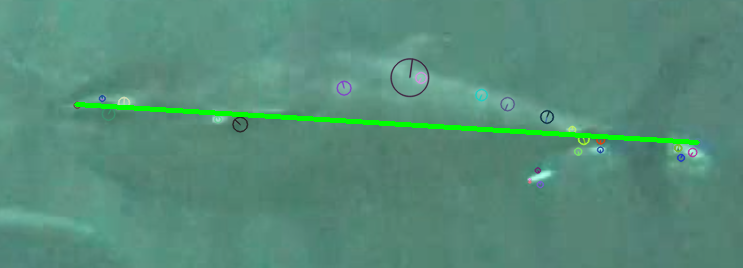

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}

img = cv2.imread(IMG_DIR + 'tuna1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Draw a line between the two points furthest from each other
distances = []
for i in range(len(kp)):
    for j in range(i+1, len(kp)):
        distance = ((kp[i].pt[0]-kp[j].pt[0])**2 + (kp[i].pt[1]-kp[j].pt[1])**2)**0.5
        distances.append((i, j, distance))
        
distances = sorted(distances, key=lambda x: x[2], reverse=True)

x1, y1 = kp[distances[0][0]].pt
x2, y2 = kp[distances[0][1]].pt

img_kp = cv2.line(img_kp, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 3)

cv2_imshow(img_kp)



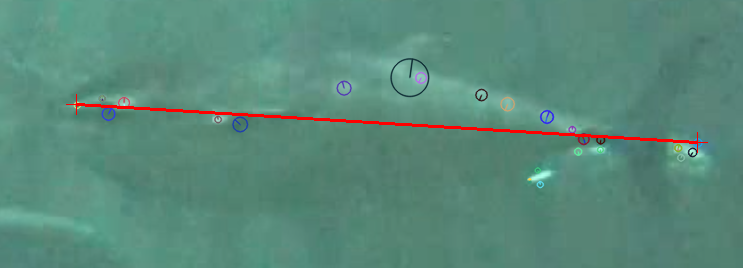

Max distance: 621.711115839924


In [ ]:
import cv2
import numpy as np

IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
img = cv2.imread(IMG_DIR + 'tuna1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

max_dist = -1
for i in range(len(kp)):
    for j in range(i+1, len(kp)):
        dist = cv2.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
        if dist > max_dist:
            max_dist = dist
            max_i = i
            max_j = j

# Draw a line between the keypoints with the maximum distance
img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)

# Display the image with the line
from google.colab.patches import cv2_imshow
cv2_imshow(img_kp_with_line)

# Print the distance between the keypoints with the maximum distance
print('Max distance:', max_dist)


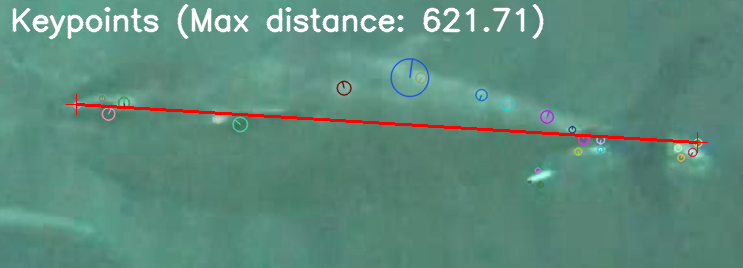

In [ ]:
#@markdown a
import cv2
import numpy as np

IMG_DIR = "/content/drive/MyDrive/data/tuna/"
img = cv2.imread(IMG_DIR + 'tuna1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray, None)

img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

max_dist = -1
for i in range(len(kp)):
    for j in range(i+1, len(kp)):
        dist = cv2.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
        if dist > max_dist:
            max_dist = dist
            max_i = i
            max_j = j

# Draw a line between the keypoints with the maximum distance
img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)

# Add the max distance to the title
title = f"Keypoints (Max distance: {max_dist:.2f})"
cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

# Display the image with the line and title
from google.colab.patches import cv2_imshow
cv2_imshow(img_kp_with_line)


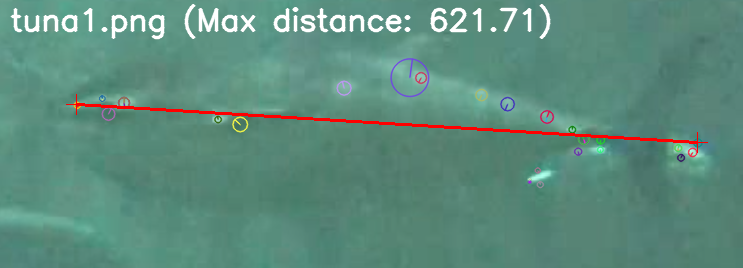

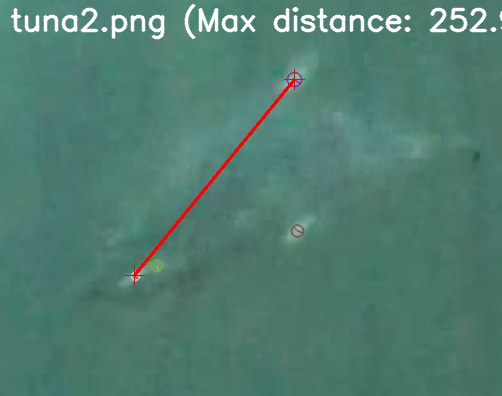

In [ ]:
#@markdown a
import cv2
import numpy as np
import os

IMG_DIR = "/content/drive/MyDrive/data/tuna/"
for filename in os.listdir(IMG_DIR):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(IMG_DIR, filename))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        sift = cv2.xfeatures2d.SIFT_create()
        kp = sift.detect(gray, None)

        img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

        max_dist = -1
        for i in range(len(kp)):
            for j in range(i+1, len(kp)):
                dist = cv2.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
                if dist > max_dist:
                    max_dist = dist
                    max_i = i
                    max_j = j

        # Draw a line between the keypoints with the maximum distance
        img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)

        # Add the max distance to the title
        title = f"{filename} (Max distance: {max_dist:.2f})"
        cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Display the image with the line and title
        from google.colab.patches import cv2_imshow
        cv2_imshow(img_kp_with_line)


In [ ]:
#@markdown define
def detect_keypoints(img, method):
    detector = None
    if method == 'sift':
        detector = cv2.xfeatures2d.SIFT_create()
    elif method == 'orb':
        detector = cv2.ORB_create()
    elif method == 'fast':
        detector = cv2.FastFeatureDetector_create()
    elif method == 'mser':
        detector = cv2.MSER_create()
    elif method == 'kaze':
        detector = cv2.KAZE_create()
    elif method == 'akaze':
        detector = cv2.AKAZE_create()
    elif method == 'brisk':
        detector = cv2.BRISK_create()
    else:
        detector = cv2.FastFeatureDetector_create()

    kp = detector.detect(img, None)
    return kp



def draw_keypoints(img, kp):
    img_kp = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_kp

def get_max_distance(kp):
    max_dist = 0
    max_i = 0
    max_j = 0
    if len(kp) > 0:
        for i in range(len(kp)):
            for j in range(i+1, len(kp)):
                dist = np.linalg.norm(np.array(kp[i].pt) - np.array(kp[j].pt))
                if dist > max_dist:
                    max_dist = dist
                    max_i = i
                    max_j = j
    return max_dist, max_i, max_j


IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
OUTPUT_DIR = "/content/drive/MyDrive/data/output/" #@param {type:"string"}

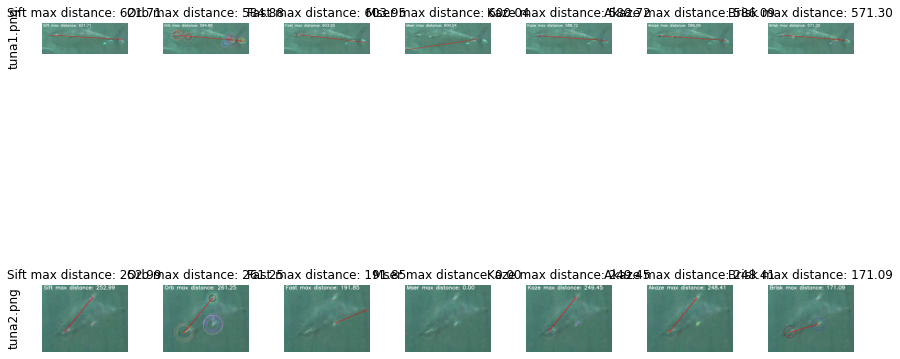

In [ ]:
#@markdown plot each
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

methods = ['sift', 'orb', 'fast', 'mser', 'kaze', 'akaze', 'brisk']


# Create output directory
i = 1
while os.path.exists(OUTPUT_DIR + f"exp{i}"):
    i += 1
output_dir = OUTPUT_DIR + f"exp{i}"
os.makedirs(output_dir)

fig, axs = plt.subplots(len(os.listdir(IMG_DIR)), len(methods), figsize=(12, 8))
fig.tight_layout(h_pad=0.5, w_pad=0.5)

for i, filename in enumerate(os.listdir(IMG_DIR)):
    img_path = os.path.join(IMG_DIR, filename)
    img = cv2.imread(img_path)
    
    # Add image name to left side of subplot
    axs[i, 0].text(-0.25, 0.5, filename, fontsize=12, ha='right', va='center', rotation=90, transform=axs[i, 0].transAxes)
    axs[i, 0].axis('off')
    
    for j, method in enumerate(methods):
        kp = detect_keypoints(img, method)
        img_kp = draw_keypoints(img, kp)
        max_dist, max_i, max_j = get_max_distance(kp)
        img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)
        title = f"{method.capitalize()} max distance: {max_dist:.2f}"
        cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Save output image to output directory
        output_path = os.path.join(output_dir, f"{filename}_{method}.jpg")
        cv2.imwrite(output_path, img_kp_with_line)
        
        # Display output image in subplot
        axs[i, j].imshow(cv2.cvtColor(img_kp_with_line, cv2.COLOR_BGR2RGB))
        axs[i, j].axis('off')
        axs[i, j].set_title(title)
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        
plt.show()


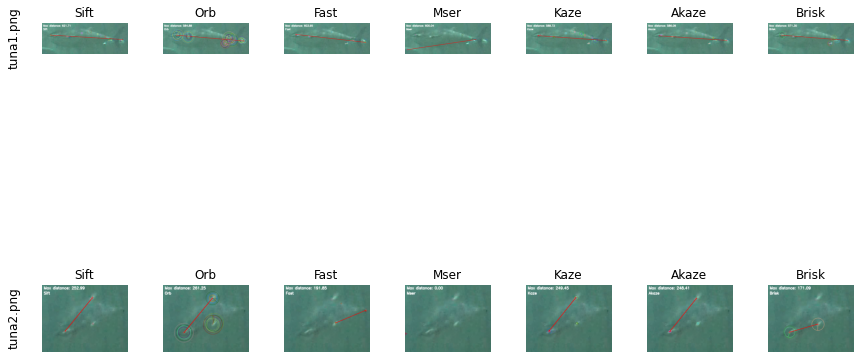

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

methods = ['sift', 'orb', 'fast', 'mser', 'kaze', 'akaze', 'brisk']

# Create output directory
i = 1
while os.path.exists(OUTPUT_DIR + f"exp{i}"):
    i += 1
output_dir = OUTPUT_DIR + f"exp{i}"
os.makedirs(output_dir)

fig, axs = plt.subplots(len(os.listdir(IMG_DIR)), len(methods), figsize=(12, 8))
fig.tight_layout(h_pad=0.5, w_pad=0.5)

for i, filename in enumerate(os.listdir(IMG_DIR)):
    img_path = os.path.join(IMG_DIR, filename)
    img = cv2.imread(img_path)
    
    # Add image name to left side of subplot
    axs[i, 0].text(-0.25, 0.5, filename, fontsize=12, ha='right', va='center', rotation=90, transform=axs[i, 0].transAxes)
    axs[i, 0].axis('off')
    
    for j, method in enumerate(methods):
        kp = detect_keypoints(img, method)
        img_kp = draw_keypoints(img, kp)
        max_dist, max_i, max_j = get_max_distance(kp)
        img_kp_with_line = cv2.drawMarker(img_kp, tuple(map(int, kp[max_i].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.drawMarker(img_kp_with_line, tuple(map(int, kp[max_j].pt)), color=(0, 0, 255))
        img_kp_with_line = cv2.line(img_kp_with_line, tuple(map(int, kp[max_i].pt)), tuple(map(int, kp[max_j].pt)), color=(0, 0, 255), thickness=2)
        title = f"Max distance: {max_dist:.2f}"
        method_desc = f"{method.capitalize()}"
        cv2.putText(img_kp_with_line, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(img_kp_with_line, method_desc, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Save output image to output directory
        output_path = os.path.join(output_dir, f"{filename}_{method}.jpg")
        cv2.imwrite(output_path, img_kp_with_line)
        
        # Display output image in subplot
        axs[i, j].imshow(cv2.cvtColor(img_kp_with_line, cv2.COLOR_BGR2RGB))
        axs[i, j].axis('off')
        axs[i, j].set_title(method_desc)
        axs[i, j].set_xticklabels([])
        axs[i, j].set_yticklabels([])
        
plt.show()


In [ ]:
!pip install -q gradio opencv-python-headless


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
!python /content/drive/MyDrive/yolov8_tracking/gui/keypoints_gui.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/yolov8_tracking/gui/keypoints_gui.py", line 112, in <module>
    iface = gr.Interface(fn=gradio_interface, inputs=..., outputs=...)
  File "/usr/local/lib/python3.8/dist-packages/gradio/interface.py", line 202, in __init__
    assert isinstance(inputs, (str, list, IOComponent))
AssertionError


In [ ]:
!python /content/drive/MyDrive/yolov8_tracking/gui/example.py

/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:43: UserWarning: You have unused kwarg parameters in Interface, please remove them: {'share': True}
  warnings.warn(
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
Keyboard interruption in main thread... closing server.
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/gradio/blocks.py", line 1664, in block_thread
    time.sleep(0.1)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/drive/MyDrive/yolov8_tracking/gui/example.py", line 8, in <module>
    demo.launch()   
  File "/usr/local/lib/python3.8/dist-packages/gradio/blocks.py", line 1581, in launch
    self.block_thread()
  File "/usr/local/lib/python3.8/dist-packages/gradio/blocks.py", line 1667, in block_thread
    self.server.close()
  File "/usr/local/lib/python3.8/dist-packages/gradio/netwo

In [ ]:
import gradio as gr
import torch
import torchvision.models as models
from torchvision import transforms
import requests
from PIL import Image

alexnet = models.alexnet(pretrained=True).eval()
raw_labels = requests.get("https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt").text
labels = [i.split(',')[0] for i in list(eval(raw_labels).values())]

def inference(data):
    image = transforms.ToTensor()(Image.fromarray(data.astype('uint8'), 'RGB')).unsqueeze(0)
    prediction = torch.nn.functional.softmax(alexnet(image)[0], dim=0)
    dictionary = dict(zip(labels, map(float, prediction)))
    return dictionary

gr.Interface(fn=inference, 
             inputs=gr.inputs.Image(), 
             outputs=gr.outputs.Label(num_top_classes=5)).launch(share=True) #, debug=True Use in Colab

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f66363d1-4d90-4ae8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
#@markdown OOP


# Augumentation

In [ ]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
!pip install -U -q albumentations

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import Dataset
import albumentations as albu


IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
MASK_DIR = '/content/drive/MyDrive/data/mask_tuna/' #@param {type:"string"}

img_names = os.listdir(IMG_DIR)
mask_names = os.listdir(MASK_DIR)

for img_name, mask_name in zip(img_names, mask_names):
    img = cv2.imread(IMG_DIR + img_name)
    mask = cv2.imread(MASK_DIR + mask_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_origin, mask_origin = img.copy(), mask.copy()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].imshow(img)
    axes[1].imshow(mask)
    plt.show()


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import albumentations as albu


IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
MASK_DIR = '/content/drive/MyDrive/data/mask_tuna/' #@param {type:"string"}

img_names = os.listdir(IMG_DIR)
mask_names = os.listdir(MASK_DIR)

for img_name, mask_name in zip(img_names, mask_names):
    img_path = os.path.join(IMG_DIR, img_name)
    mask_path = os.path.join(MASK_DIR, mask_name)
    print(f'Reading image from {img_path}')
    img = cv2.imread(img_path)
    if img is None:
        print(f'Error: Failed to read image {img_path}')
        continue
    print(f'Reading mask from {mask_path}')
    mask = cv2.imread(mask_path)
    if mask is None:
        print(f'Error: Failed to read mask {mask_path}')
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    img_origin, mask_origin = img.copy(), mask.copy()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].imshow(img)
    axes[1].imshow(mask)
    plt.show()


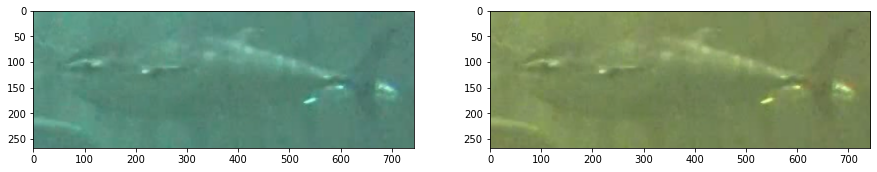

In [ ]:
import os, sys
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import albumentations as albu


IMG_DIR = "/content/drive/MyDrive/data/tuna/" #@param {type:"string"}
MASK_DIR = '/content/drive/MyDrive/data/mask_tuna/' #@param {type:"string"}

img = cv2.imread(IMG_DIR + 'tuna1.png')
mask = cv2.imread(MASK_DIR + 'mask.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_origin, mask_origin = img.copy(), mask.copy()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(img)
axes[1].imshow(mask)
plt.show()


In [ ]:
import os, sys
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import Dataset
import albumentations as albu


IMG_DIR = "/content/drive/MyDrive/data/tuna" #@param {type:"string"}
MASK_DIR = '/content/drive/MyDrive/data/mask_tuna' #@param {type:"string"}

img = cv2.imread(IMG_DIR + 'tuna1.png')
mask = cv2.imread(MASK_DIR + 'mask.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

img_origin, mask_origin = img.copy(), mask.copy()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(img)
axes[1].imshow(mask);

error: ignored

# Detect

In [ ]:
%cd /content/drive/MyDrive/yolov8_tracking/yolov8
!pip install -qr requirements.txt

/content/drive/MyDrive/yolov8_tracking/yolov8


In [5]:
!pip install albumentations -q
#@title Select YOLOv8 🚀 logger {run: 'auto'}
logger = 'ClearML' #@param ['ClearML', 'Comet', 'TensorBoard']

if logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.7/967.7 KB 19.9 MB/s eta 0:00:00


<IPython.core.display.Javascript object>


🤖 ClearML connected successfully - let's build something! 🚀


In [6]:
!pip install -U -q albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 5.4 MB/s eta 0:00:00


In [ ]:
# import time
# time.sleep(900) # pause for 900 seconds (15 minutes)

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/data/all1490/data.yaml epochs=150 imgsz=640 batch=16

100% 83.7M/83.7M [00:00<00:00, 208MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/drive/MyDrive/data/all1490/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

In [12]:
!yolo task=detect mode=train model=yolov8x.pt data=/content/drive/MyDrive/data/all1490/data.yaml epochs=150 imgsz=640 resume model=/content/drive/MyDrive/yolov8_tracking/yolov8/runs/detect/train15/weights/last.pt

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolov8_tracking/yolov8/runs/detect/train15/weights/last.pt, data=/content/drive/MyDrive/data/all1490/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, form

In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data=/content/drive/MyDrive/data/all1490/data.yaml epochs=150 imgsz=640 batch=8

# Track



In [ ]:
%cd /content/drive/MyDrive/yolov8_tracking
!pip install -qr requirements.txt

/content/drive/MyDrive/yolov8_tracking
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 KB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.8 MB/s eta 0:00:00


In [ ]:
input = "/content/drive/MyDrive/data/733.m4v" #@param {type:"string"}
weights = "/content/drive/MyDrive/yolov8_tracking/yolov8/runs/detect/train5/weights/best.pt" #@param {type:"string"}

In [ ]:
!python track.py --source {input} --yolo-weights {weights} --save-vid --save-txt --save-crop

track: yolo_weights=[PosixPath('/content/drive/MyDrive/yolov8_tracking/yolov8/runs/detect/train5/weights/best.pt')], reid_weights=/content/drive/MyDrive/yolov8_tracking/weights/osnet_x0_25_msmt17.pt, tracking_method=bytetrack, tracking_config=trackers/bytetrack/configs/bytetrack.yaml, source=/content/drive/MyDrive/data/733.m4v, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.5, max_det=1000, device=, show_vid=False, save_txt=True, save_conf=False, save_crop=True, save_trajectories=False, save_vid=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/track, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, hide_class=False, half=False, dnn=False, vid_stride=1, retina_masks=False
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
video 1/1 (1/148) /content/drive/MyDrive/data/733.m4v: 384x6

In [ ]:
output = "/content/drive/MyDrive/yolov8_tracking/runs/track/exp5/733.mp4" #@param {type:"string"}
# Show video
mp4 = open(output,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

NameError: ignored